### Inhaltsverzeichnis

* [1. Business Understanding](#chapter1)
    * [1.1. Projektbeschreibung](#section_1_1)
    * [1.2. Data Dictionary](#section_1_2)
* [2. Data Understanding](#chapter2)
    * [2.1. Pakete importieren](#section_2_1)
    * [2.2. Daten einlesen](#section_2_2)
    * [2.3. Datensatz anzeigen](#section_2_3)
    * [2.4. Spaltennamen und Datentypen](#section_2_4)
    * [2.5. Datentypen anpassen](#section_2_5)
        * [2.5.1 Variable Age](#section_2_5_1)
        * [2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage](#section_2_5_2)
        * [2.5.3 Variable Gender](#section_2_5_3)
        * [2.5.4 Variable Region Code](#section_2_5_4)
        * [2.5.5 Variable Vehicle_Age](#section_2_5_5)
        * [2.5.6 Variable Policy_Sales_Channel](#section_2_5_6)
        * [2.5.7 Variable Vintage](#section_2_5_7)
        * [2.5.8 Variable Unnamed: 0](#section_2_5_8)
        * [2.5.9 Angepasste Datentypen anzeigen](#section_2_5_9)
    * [2.6. Deskriptive Analyse](#section_2_6)
        * [2.6.1 Kennzahlen zur Beschreibung des Datensatz](#section_2_6_1)
        * [2.6.2 Prüfung auf Missing Values](#section_2_6_2)
    * [2.7. Korrelation der Variablen](#section_2_7)
    * [2.8. Interpretation der Variablen](#section_2_8)
        * [2.8.1 Interpretation der Variable Gender](#section_2_8_1)
        * [2.8.2 Interpretation der Variable Age](#section_2_8_2)
        * [2.8.3 Interpretation der Variable Driving_License](#section_2_8_3)
        * [2.8.4 Interpretation der Variable Region_Code](#section_2_8_4)
        * [2.8.5 Interpretation der Variable Previously_Insured](#section_2_8_5)
        * [2.8.6 Interpretation der Variable Vehicle_Age](#section_2_8_6)
        * [2.8.7 Interpretation der Variable Vehicle_Damage](#section_2_8_7)
        * [2.8.8 Interpretation der Variable Annual_Premium](#section_2_8_8)
        * [2.8.9 Interpretation der Variable Policy_Sales_Channel](#section_2_8_9)
        * [2.8.10 Interpretation der Variable Vintage](#section_2_8_10)
        * [2.8.11 Interpretation der Variable Response](#section_2_8_11)
* [3. Data Preparation](#chapter3)
    * [3.1. Ausreißer behandeln](#section_3_1)
        * [3.1.1 Ausreißer innerhalb der Variable Age](#section_3_1_1)
        * [3.1.2 Ausreißer innerhalb der Variable Annual_Premium](#section_3_1_2)
    * [3.2. Analyse der nicht vorhandenen Werte](#section_3_2)
        * [3.2.1 Löschen der 51 fehlerhaften Datensätze](#section_3_2_1)
    * [3.3. Imputation der fehlenden Werte](#section_3_3)
        * [3.3.1 Variante 1: Ersetzung der fehlenden Werte durch den Mittelwert](#section_3_3_1)
            * [3.3.1.1 Imputation der Variable Age](#section_3_3_1_1)
            * [3.3.1.2 Imputation der Variable Annual Premium](#section_3_3_1_2)
        * [3.3.2 Variante 2: Ersetzung der fehlenden Werte durch den Median](#section_3_3_2)
            * [3.3.2.1 Imputation der Variable Age](#section_3_3_2_1)
            * [3.3.2.2 Imputation der Variable Annual Premium](#section_3_3_2_2)
        * [3.3.3 Variante 3: Ersetzung der fehlenden Werte durch Hot Code Imputation (LOCF)](#section_3_3_3)
            * [3.3.3.1 Imputation der Variable Age](#section_3_3_3_1)
            * [3.3.3.2 Imputation der Variable Annual Premium](#section_3_3_3_2)
        * [3.3.4 Variante 4: Ersetzung der fehlenden Werte kategorialer Variablen](#section_3_3_4)
            * [3.3.4.1 Imputation der Variable Gender](#section_3_3_3_1)
        * [3.3.5 Fazit](#section_3_3_5)
    * [3.4. Sampling](#section_3_4)
        * [3.4.1. Undersampling](#section_3_4_1)
        * [3.4.2. Oversampling](#section_3_4_2)
    * [3.5. Feature Engineering](#section_3_5)
        * [3.5.1. Altersklassen als Feature](#section_3_5_1)
        * [3.5.2. Features durch Aggregationen, Differenzen und Verhältnisse](#section_3_5_2)
        * [3.5.3. Features durch Datumsfunktionen](#section_3_5_3)
             * [3.5.3.1 Festlegung des aktuellen Jahres](#section_3_5_3_1)
             * [3.5.3.2 Berechnung weiterer Features anhand von Datumsfunktionen](#section_3_5_3_2)
        * [3.5.4. Zyklische Transformation der Datumsvariablen](#section_3_5_4)
        * [3.5.5. weitere Features](#section_3_5_5)
    * [3.6. Feature Selection](#section_3_6)
    * [3.7. Final Preprocessing](#section_3_7)
* [4. Modeling](#chapter4)
    * [4.1. Aufteilung in Test- und Trainingsdaten](#section_4_1)
    * [4.2. Modell: RandomForest](#section_4_2)
* [5. Evaluation](#chapter5)
* [6. Anwendung](#chapter6)
* [7. Deployment](#chapter7)

* [Model Explainer mit SHAP Values](#chapter8)

    * [Fazit zum Model Explainer mit SHAP Values](#section_8_1)
        

### 1. Business Understanding <a class="anchor" id="chapter1"></a>

#### 1.1 Projektbeschreibung <a class="anchor" id="section_1_1"></a>

Das Forschungsteam *ProInsurance* wird damit beauftragt, dass Projekt Cross-Selling-Prediction für den Kunden *NextGen Insurance* durchzuführen. 
Der Kunde benötigt Hilfe bei der Erstellung eines Modells, mit dem sich vorhersagen lässt, ob die Versicherungsnehmer des letzten Jahres auch an einer angebotenen Kfz-Versicherung interessiert sein werden.
Der Kunde wünscht die Durchführung des Projektes innerhalb eines knapp kalkulierten Zeitraums.

Zu diesem Zweck erhält das Forschungsteam von ihrem Auftraggeber einen Datenbestand bestehend aus > 300.000 Datensätzen. Zusätzlich ein Data Dictionary, welches eine kurze Beschreibung der Daten liefert.

Die *NextGen Insurance* hat mehrere Forschungsteams beauftragt an einer Lösung zu arbeiten, damit Sie sich nach Ende der Präsentationen für die beste Alternative entscheiden können.

#### 1.2 Data Dictionary <a class="anchor" id="section_1_2"></a>

Unser Auftraggeber die *NextGen Insurance* stellt uns folgendes Data Dictionary und damit verbunden folgende Beschreibungen der einzelnen Variablen zur Verfügung:

**1 - id : Unique ID for the customer<br>
2 - Gender : Gender of the customer<br>
3 - Age : Age of the customer <br>
4 - Driving_License : 0 : Customer doesn't have DL, 1 : Customer has DL<br>
5 - Region_Code : Unique code for the region of the customer<br>
6 - Previously_Insured : 0 : Customer doesn't have Vehicle Insurance, 1 : Customer has Vehicle Insurance<br> 
7 - Vehicle_Age : Age of the Vehicle<br>
8 - Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past<br>
9 - Annual_Premium : The amount customer needs to pay as premium in the year for Health insurance<br>
10 - Policy_Sales_Channel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
11 - Vintage : Number of Days customer has been associated with the company<br>
12 - Response : 1 : Customer is interested, 0 : Customer is not interested**

### 2. Data Understanding <a class="anchor" id="chapter2"></a>

#### 2.1 Pakete importieren <a class="anchor" id="section_2_1"></a>

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import sklearn as sk
from sklearn.impute import KNNImputer

#### 2.2 Daten einlesen <a class="anchor" id="section_2_2"></a>

Der Datensatz wurde von der *NextGen Insurance* bereitgestellt.<br>
Der Datensatz wird zur Analyse eingelesen:
- Entfernung des Trennzeichen "$".
- Umwandlung von Zelleninhalten in Wahrheitswerte (Yes, yes, 1; No, no, 0).
- Einrücken des Datensatzes.

In [2]:
data = pd.read_csv(
    "train.csv",
    sep="$",
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    low_memory=False,
)

#### 2.3 Datensatz Anzeigen <a class="anchor" id="section_2_3"></a>

Zur Betrachtung der Variablen aus dem Datensatz werden die ersten zwanzig Einträge angezeigt:

In [3]:
data.head(20)


,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,False,28.0,False,> 2 Years,True,40454.0,26.0,217,True
1,1,2,Male,76,False,3.0,False,1-2 Year,False,33536.0,26.0,183,False
2,2,3,Male,47,False,28.0,False,> 2 Years,True,38294.0,26.0,27,True
3,3,4,Male,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,False
4,4,5,Female,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,False
5,5,6,Female,24,False,33.0,False,< 1 Year,True,2630.0,160.0,176,False
6,6,7,Male,23,False,11.0,False,< 1 Year,True,23367.0,152.0,249,False
7,7,8,Female,56,False,28.0,False,1-2 Year,True,32031.0,26.0,72,True
8,8,9,Female,24,True,3.0,True,< 1 Year,False,27619.0,152.0,28,False
9,9,10,Female,32,True,6.0,True,< 1 Year,False,28771.0,152.0,80,False


#### 2.4 Spaltennamen und Datentypen <a class="anchor" id="section_2_4"></a>

Um eventuelle Korrekturen vorzunehmen betrachten wir die Datentypen der im Datensatz enthaltenen Variablen.<br>
- Die Spalten **Driving_License**, **Previously_Insured**, und **Vehicle_Damage** wurden nicht in den booleschen Datentypen gecastet. Dies ist ein Indikator dafür das diese Spalten invalide oder fehlende Werte enthalten.
- Die Spalte **Age** wurde nicht in einen Integer oder Float gecastet, auch hier ist dies ein Indikator dafür, dass diese Spalte invalide oder fehlende Werte enthält. 

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            380999 non-null  int64  
 1   id                    380999 non-null  int64  
 2   Gender                379948 non-null  object 
 3   Age                   370107 non-null  object 
 4   Driving_License       380948 non-null  object 
 5   Region_Code           380999 non-null  object 
 6   Previously_Insured    380948 non-null  object 
 7   Vehicle_Age           380948 non-null  object 
 8   Vehicle_Damage        380948 non-null  object 
 9   Annual_Premium        380999 non-null  float64
 10  Policy_Sales_Channel  380999 non-null  object 
 11  Vintage               380948 non-null  object 
 12  Response              380999 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 35.2+ MB


#### 2.5 Datentypen anpassen <a class="anchor" id="section_2_5"></a>

- Die zum Pandas Modul zugehörige Funktion ".unique()" ermöglicht die Ausgabe aller einzigartigen Werte. Dies erleichtert das Nachvollziehen von Eingabefehlern um diese zu korrigieren.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

##### 2.5.1 Variable Age <a class="anchor" id="section_2_5_1"></a>

- Die letzten Werte beinhalten Eingabefehler. Bevor der Datentyp umgewandelt werden kann müssen die zwei Punkte (..) nach den Zahlen entfernt werden. 

In [5]:
data["Age"].unique()


array(['44', '76', '47', '21', '29', '24', '23', '56', '32', '41', '71',
       '37', '25', '42', '60', '65', '49', '34', '51', '26', '57', '79',
       '48', '45', '72', '30', '54', '27', '38', '22', '78', '20', '39',
       '62', '58', '59', '63', '50', '67', '77', '28', '69', '52', '31',
       '33', '43', '36', '53', '70', '46', '55', '40', '61', '75', '64',
       '35', '66', '68', '74', '73', '84', '83', '81', '80', '133', '171',
       '163', '144', '187', '203', '143', '123', '183', '167', '129',
       '127', '142', '82', '175', '128', '150', '196', '154', '198',
       '116', '152', '161', '114', '166', '124', '134', '173', '106',
       '199', '162', '157', '132', '156', '119', '159', '85', '192',
       '201', '177', '121', '160', '136', '148', '158', '113', '184',
       '182', '122', '190', '174', '176', '195', '147', '189', nan, '181',
       '188', '107', '145', '149', '137', '139', '126', '130', '202',
       '138', '193', '109', '179', '155', '125', '172', '200', '135

Aus dieser Ausgabe kann man sehen, dass einige fehlerhaften Eingaben getätigt wurden (z.B. "29.."). Da die Werte dieser Datensätze aber inhaltlich richtig sein könnten, sollen sie behalten werden. Durch das Casten in den String-Datentyp können die fehlerhaften Sonderzeichen entfertnt werden. Aschließend wird die Variable in den gewünschten Integer-Datentypen gecastet.

In [6]:
# convert to string
data["Age"] = data["Age"].astype(pd.StringDtype())

# remove .. as this is what prevents us from propper type conversion
data["Age"] = data["Age"].str.replace(".", "")

# convert to int (no decimals observed in train data)
data["Age"] = data["Age"].astype("Int64")


C:\Users\tomiz\AppData\Local\Temp/ipykernel_7012/1158487521.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Age"] = data["Age"].str.replace(".", "")


##### 2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage <a class="anchor" id="section_2_5_2"></a>

- Die Spalten beinhalten fehlende Werte (NaN). Damit die fehlenden Werte ordnungsgemäß behandelt werden können, müssen die Spalten in den nullable Boolean Type gecastet werden.

In [7]:
print("Driving_License:", data["Driving_License"].unique())
print("Previously_Insured:", data["Previously_Insured"].unique())
print("Vehicle_Damage:", data["Vehicle_Damage"].unique())


Driving_License: [False True nan]
Previously_Insured: [False True nan]
Vehicle_Damage: [True False nan]


Die Ausgabe weist darauf hin, dass diese Variablen richtig einglesen werden konnten und es keine (inhaltlich) falschen Ausprägungen gibt. Es gibt nur `True`, `False` und fehlende Werte. 

In [8]:
# convert each column
data["Driving_License"] = data["Driving_License"].astype(pd.BooleanDtype())
data["Previously_Insured"] = data["Previously_Insured"].astype(pd.BooleanDtype())
data["Vehicle_Damage"] = data["Vehicle_Damage"].astype(pd.BooleanDtype())


##### 2.5.3 Variable Gender <a class="anchor" id="section_2_5_3"></a>

In [9]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data["Gender"] = data["Gender"].astype(pd.CategoricalDtype())


##### 2.5.4 Variable Region Code <a class="anchor" id="section_2_5_4"></a>

- Der letzte Werte beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 41.0 die zwei Rautezeichen (##) entfernt werden.

In [11]:
data["Region_Code"].unique()

array(['28.0', '3.0', '11.0', '41.0', '33.0', '6.0', '35.0', '50.0',
       '15.0', '45.0', '8.0', '36.0', '30.0', '26.0', '16.0', '47.0',
       '48.0', '19.0', '39.0', '23.0', '37.0', '5.0', '17.0', '2.0',
       '7.0', '29.0', '46.0', '27.0', '25.0', '13.0', '18.0', '20.0',
       '49.0', '22.0', '44.0', '0.0', '9.0', '31.0', '12.0', '34.0',
       '21.0', '10.0', '14.0', '38.0', '24.0', '40.0', '43.0', '32.0',
       '4.0', '51.0', '42.0', '1.0', '52.0', '41.0##'], dtype=object)

In [12]:
# convert to string
data["Region_Code"] = data["Region_Code"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
data["Region_Code"] = data["Region_Code"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
data["Region_Code"] = data["Region_Code"].astype(pd.CategoricalDtype())


##### 2.5.5 Variable Vehicle_Age <a class="anchor" id="section_2_5_5"></a>

In [13]:
data["Vehicle_Age"].unique()


array(['> 2 Years', '1-2 Year', '< 1 Year', nan], dtype=object)

In [14]:
# no cleanup required
data["Vehicle_Age"] = data["Vehicle_Age"].astype(pd.CategoricalDtype())


##### 2.5.6 Variable Policy_Sales_Channel <a class="anchor" id="section_2_5_6"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 26.0 die zwei Rautezeichen (##) entfernt werden.

In [15]:
data["Policy_Sales_Channel"].unique()


array(['26.0', '152.0', '160.0', '124.0', '14.0', '13.0', '30.0', '156.0',
       '163.0', '157.0', '122.0', '19.0', '22.0', '15.0', '154.0', '16.0',
       '52.0', '155.0', '11.0', '151.0', '125.0', '25.0', '61.0', '1.0',
       '86.0', '31.0', '150.0', '23.0', '60.0', '21.0', '121.0', '3.0',
       '139.0', '12.0', '29.0', '55.0', '7.0', '47.0', '127.0', '153.0',
       '78.0', '158.0', '89.0', '32.0', '8.0', '10.0', '120.0', '65.0',
       '4.0', '42.0', '83.0', '136.0', '24.0', '18.0', '56.0', '48.0',
       '106.0', '54.0', '93.0', '116.0', '91.0', '45.0', '9.0', '145.0',
       '147.0', '44.0', '109.0', '37.0', '140.0', '107.0', '128.0',
       '131.0', '114.0', '118.0', '159.0', '119.0', '105.0', '135.0',
       '62.0', '138.0', '129.0', '88.0', '92.0', '111.0', '113.0', '73.0',
       '36.0', '28.0', '35.0', '59.0', '53.0', '148.0', '133.0', '108.0',
       '64.0', '39.0', '94.0', '132.0', '46.0', '81.0', '103.0', '90.0',
       '51.0', '27.0', '146.0', '63.0', '96.0', '40.0', 

In [16]:
# remove ## as this is what prevents us from propper type conversion
data["Policy_Sales_Channel"] = data["Policy_Sales_Channel"].str.replace("#", "")

data["Policy_Sales_Channel"] = data["Policy_Sales_Channel"].astype(
    pd.CategoricalDtype()
)


##### 2.5.7 Variable Vintage <a class="anchor" id="section_2_5_7"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 81 die zwei Rautezeichen (##) entfernt werden.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

In [17]:
data["Vintage"].unique()


array(['217', '183', '27', '203', '39', '176', '249', '72', '28', '80',
       '46', '289', '221', '15', '58', '147', '256', '299', '158', '102',
       '116', '177', '232', '60', '180', '49', '57', '223', '136', '222',
       '149', '169', '88', '253', '107', '264', '233', '45', '184', '251',
       '153', '186', '71', '34', '83', '12', '246', '141', '216', '130',
       '282', '73', '171', '283', '295', '165', '30', '218', '22', '36',
       '79', '81', '100', '63', '242', '277', '61', '111', '167', '74',
       '235', '131', '243', '248', '114', '281', '62', '189', '139',
       '138', '209', '254', '291', '68', '92', '52', '78', '156', '247',
       '275', '77', '181', '229', '166', '16', '23', '31', '293', '219',
       '50', '155', '66', '260', '19', '258', '117', '193', '204', '212',
       '144', '234', '206', '228', '125', '29', '18', '84', '230', '54',
       '123', '101', '86', '13', '237', '85', '98', '67', '128', '95',
       '89', '99', '208', '134', '135', '268', '284', 

In [18]:
# convert to string
data["Vintage"] = data["Vintage"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
data["Vintage"] = data["Vintage"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
data["Vintage"] = data["Vintage"].astype("Int64")


##### 2.5.8 Variable Unnamed: 0 <a class="anchor" id="section_2_5_8"></a>

- Die Spalte Unnamed: 0 hat keine Information und wird entfernt.

In [19]:
data.drop("Unnamed: 0", axis="columns", inplace=True)


##### 2.5.9 Angepasste Datentypen anzeigen <a class="anchor" id="section_2_5_9"></a>

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   Gender                379948 non-null  category
 2   Age                   370107 non-null  Int64   
 3   Driving_License       380948 non-null  boolean 
 4   Region_Code           380999 non-null  category
 5   Previously_Insured    380948 non-null  boolean 
 6   Vehicle_Age           380948 non-null  category
 7   Vehicle_Damage        380948 non-null  boolean 
 8   Annual_Premium        380999 non-null  float64 
 9   Policy_Sales_Channel  380999 non-null  category
 10  Vintage               380948 non-null  Int64   
 11  Response              380999 non-null  bool    
dtypes: Int64(2), bool(1), boolean(3), category(4), float64(1), int64(1)
memory usage: 16.7 MB


#### 2.6 Deskriptive Analyse <a class="anchor" id="section_2_6"></a>

##### 2.6.1 Kennzahlen zur Beschreibung des Datensatz <a class="anchor" id="section_2_6_1"></a>

Folgende statistische Kennzahlen werden verwenden:

In [21]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,380999.0,NaN,NaN,NaN,190500.0,109985.081943,1.0,95250.5,190500.0,285749.5,380999.0
Gender,379948,2,Male,205447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,370107.0,NaN,NaN,NaN,38.852091,15.63218,20.0,25.0,36.0,49.0,205.0
Driving_License,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,380999,53,28.0,106372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previously_Insured,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,380948,3,1-2 Year,200228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,380948,2,True,192328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,380999.0,NaN,NaN,NaN,30527.70069,17242.997675,-9997.0,24371.0,31656.0,39390.0,540165.0
Policy_Sales_Channel,380999,155,152.0,134747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Auffälligkeiten einzelner Variablen anhand der statistischen Kennzahlen werden im nachfolgenden näher erläutert:

| **Variable**          | **Beschreibung**  | 
|          :-           |         :-        |
| ID                    |- Beginnt bei 1 und endet bei 380.999 <br> - weißt keine Auffälligkeiten auf| 
| Gender                |- Das Geschlecht "Male" kommt am häufigsten vor mit 205.447 Datensätzen <br> - 2 verschiedene Ausprägungen <br> - 1051 Datensätze fehlen (Vergleich von 379.948 zu 380.999 Datensätzen) | 
| Age                   |- min. = 20 Jahre alt nicht auffällig <br> - Im Durchschnitt 39 Jahre alt <br> - max. = 205 Jahre alt <br> - 10.892 Datensätze fehlen (Vergleich von 370.107 zu 380.999 Datensätzen) | 
| Driving_License       |- Mehr Personen haben keinen Führerschein mit 206.635 Datensätzen als das Sie einen Führerschein haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Region_Code           |- Die PLZ 28.0 kommt am häufigsten vor mit 106.372 Datensätzen <br> - 53 verschiedene Ausprägungen | 
| Previously_Insured    |- Mehr Personen haben keine Versicherung mit 206.635 Datensätzen als das Sie eine Versicherung haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Age           |- Das Alter des Fahrzeugs beläuft sich auf bei den meisten Personen auf 1-2 Jahre mit 380.948 Datensätzen <br> - 3 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Damage        |- Bei mehr Personen, 192.328 Datensätze, ist es zu einem Schadensfall gekommen <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Annual_Premium        |- min. = -9997.0€ auffällig, da der Betrag den die Kunden zahlen müssen nicht negativ sein kann. <br> - Im Durchschnitt 30.527.71€ <br> - max. = 540.165€ auffällig, da der Betrag deutlich zu hoch ist | 
| Policy_Sales_Channel  |- 155 verschiedene Ausprägungen | 
| Vintage               |- min. = 10 Tage <br> - Im Durchschnitt 154 Tage <br> - max. = 299 Tage <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Response              |- Mehr Personen sind nicht interessiert mit 334.297	Datensätzen <br> - 2 verschiedene Ausprägungen | 


##### 2.6.2 Prüfung auf Missing Values <a class="anchor" id="section_2_6_2"></a>

Die zum Pandas Modul zugehörige Funktion ".isna()" ermöglicht die Ausgabe aller Missing Values (NA Values).

In [22]:
data.isna().sum()

id                          0
Gender                   1051
Age                     10892
Driving_License            51
Region_Code                 0
Previously_Insured         51
Vehicle_Age                51
Vehicle_Damage             51
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                    51
Response                    0
dtype: int64

Die Überprüfung auf missing Values zeigt, dass vor allem für die Variable `Age` Werte imputiert werden sollten. In der Spalte `Gender` fehlen rund 1000 Werte. Weiter sieht man, dass in den Spalten `Driving_License`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage` und `Vintage` genau 51 Werte fehlen. Das deutet darauf hin, dass diese missing Values zu den selben Datensätzen gehören, was nachfolgend überprüft wird.

In [23]:
# look for the 51
# len(data.loc[data["Vintage"].isna()]) # => 51 entities
# len(data.loc[data["Vintage"].isna() & data["Vehicle_Damage"].isna()]) # => 51 entities
# len(data.loc[data["Vintage"].isna() & data["Vehicle_Damage"].isna() & data["Vehicle_Age"].isna()]) # => 51 entities
# len(data.loc[data["Vintage"].isna() & data["Vehicle_Damage"].isna() & data["Vehicle_Age"].isna() & data["Previously_Insured"].isna()]) # => 51 entities
# len(data.loc[data["Vintage"].isna() & data["Vehicle_Damage"].isna() & data["Vehicle_Age"].isna() & data["Previously_Insured"].isna() & data["Driving_License"].isna()]) # => 51 entities
bad_data = data.loc[
    data["Vintage"].isna()
    & data["Vehicle_Damage"].isna()
    & data["Vehicle_Age"].isna()
    & data["Previously_Insured"].isna()
    & data["Driving_License"].isna()
]
print(f"Data sets with Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured and Driving_License missing: {len(bad_data)}")
# bad_data.groupby("Region_Code").count().sort_values("id", ascending=False)
# bad_data.groupby("Policy_Sales_Channel").count().sort_values("id", ascending=False)
# => !!! There are 51 entities that make up most of the missing values.
# maybe we simply remove them


Data sets with Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured and Driving_License missing: 51


Mithilfe einer Und-Verbindung wird geprüft, ob die missing Values alle von den selben Datensätzen stammen.
Die Annahme wurde bestätigt. Der Test ergab 51 Treffer.
Da nur wenige Informationen zu diesen Datensätzen verfügbar sind und eine Imputation daher nur eingeschränkt möglich ist, werden die Datensätze im Verlauf der Data Preparation entfernt. Hierdurch wird die Modellgüte nicht ausschlaggebend beeinträchtigt, da 51 Datensätze in der Gesamtheit der Daten (ca. 390.000 Datensätze) keinen signifikanten Einfluss haben.

Nachfolgend wurde überprüft, woher diese fehlerhaften Datensätze kommen. Unter verdacht standen die Vertriebskanäle `Policy_Sales_Channel` und `Region_Code` was auf fehlerhafte Eingaben in einer speziellen Filiale zurückzuführen wäre.

C:\Users\tomiz\AppData\Local\Temp/ipykernel_7012/3701569683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_data["Region_Code"] = bad_data["Region_Code"].astype(


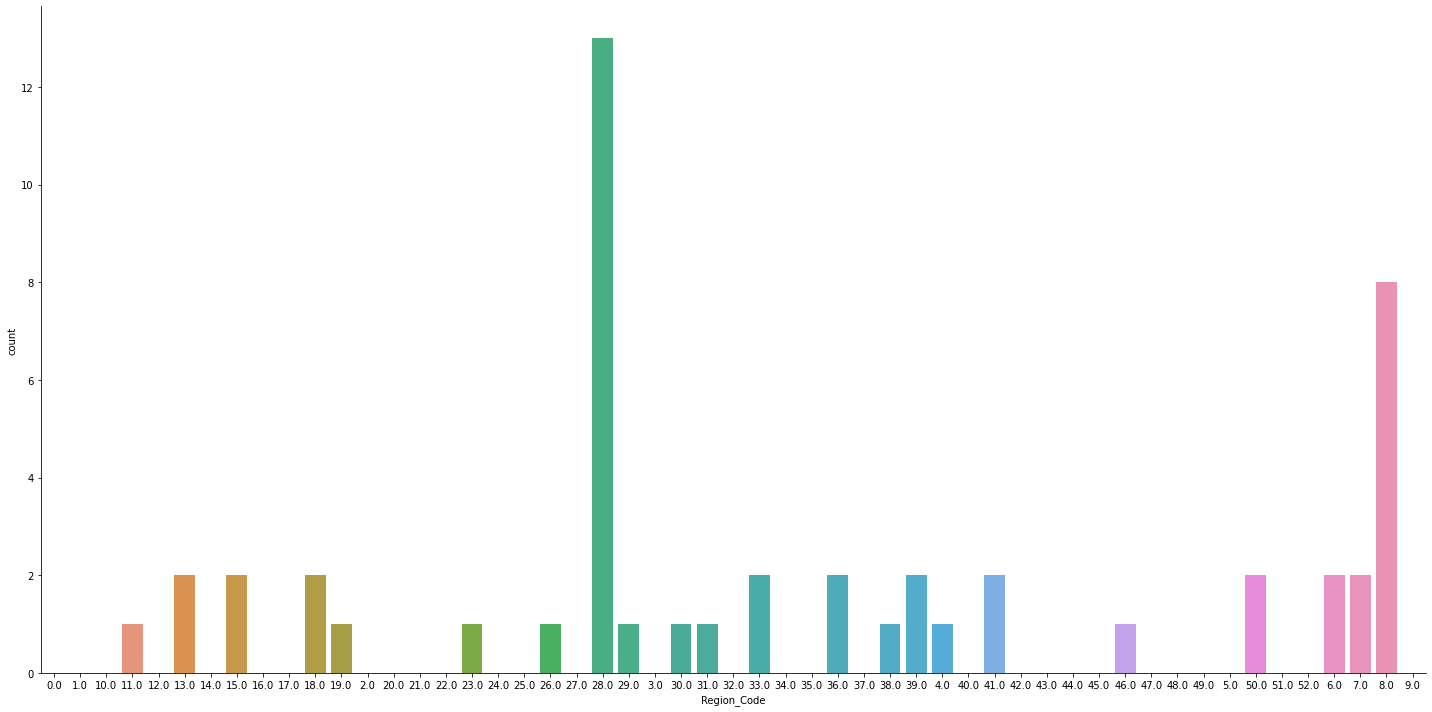

In [24]:
# cast Region_Code to Category using only the options that appear in the data frame
bad_data["Region_Code"] = bad_data["Region_Code"].astype(
    pd.CategoricalDtype(bad_data["Region_Code"].unique())
)

sns.catplot(
    data=bad_data, x="Region_Code", kind="count", height=10, aspect=2 / 1
)

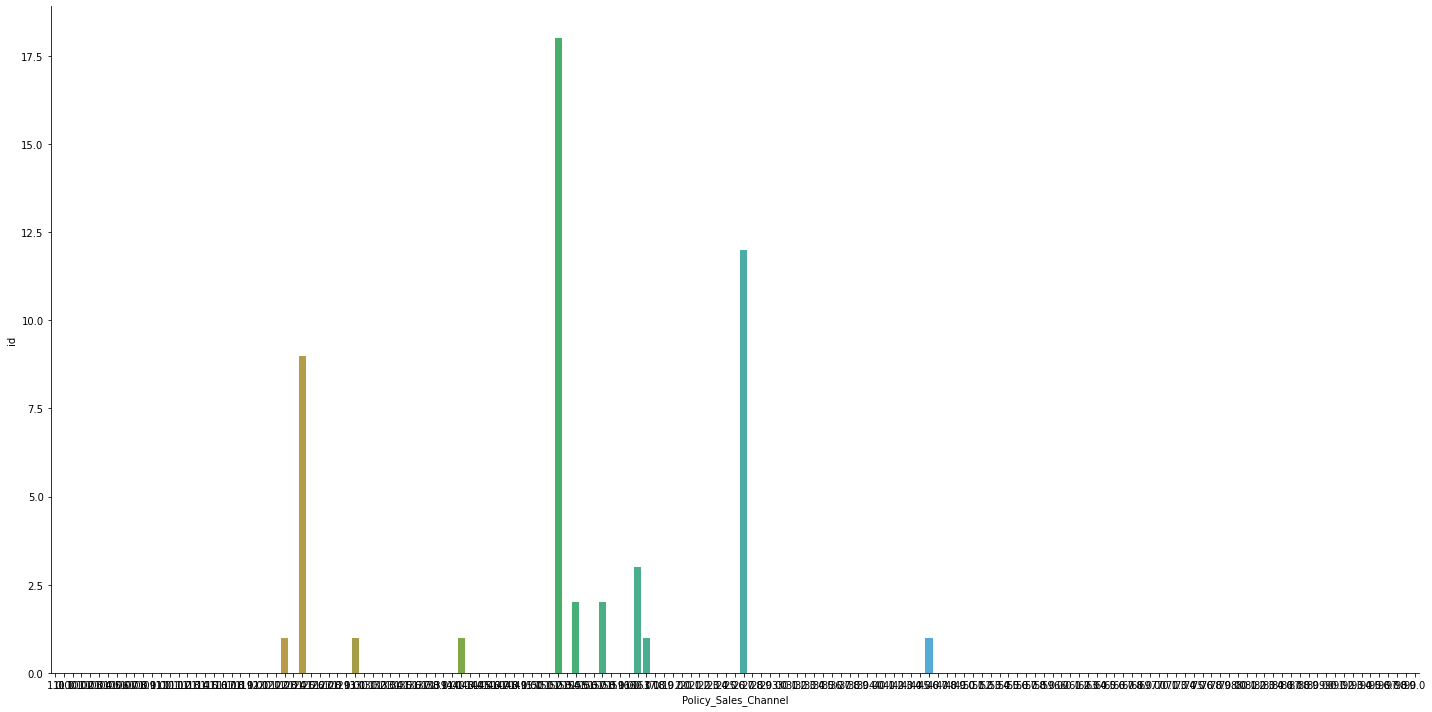

In [25]:
bad_data_grpd = bad_data.groupby("Policy_Sales_Channel").count()

bad_data_grpd = bad_data_grpd.loc[bad_data_grpd["id"] > 0]

# reset index to re-include groupby counts (this resets all dtypes)
bad_data_grpd = bad_data_grpd.reset_index()

# reset PSC to categorial dtype
bad_data_grpd["Policy_Sales_Channel"] = bad_data_grpd["Policy_Sales_Channel"].astype(
    pd.CategoricalDtype(bad_data_grpd["Policy_Sales_Channel"].unique())
)

sns.catplot(
    data=bad_data_grpd,
    x="Policy_Sales_Channel",
    y="id",
    height=10,
    aspect=2 / 1,
    kind="bar",
)


Es gibt zwar Hinweise darauf, dass manche Regionen und Sales Channel fehleranfälliger sind als andere, der Verdacht, dass die fehlerhaften Datensätze auf eine Datenquelle zurückzuführen sind, konnte nicht bestätigt werden.

#### 2.7 Korrelation der Variablen <a class="anchor" id="section_2_7"></a>

In [26]:
# remove id from correlation matrix as it does not provide any usefull information
def correlation_matrix(data):
    for column in data:
        if column == "id":
            selected_columns = data.drop("id", axis="columns")
            correlation = selected_columns.corr()
            return correlation

correlation_matrix(data)

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response
Age,1.000000,-0.254485,-0.254485,0.265097,0.066933,-0.001123,0.109969
Driving_License,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Previously_Insured,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Vehicle_Damage,0.265097,-0.823370,-0.823370,1.000000,0.009428,-0.002034,0.354438
Annual_Premium,0.066933,0.003981,0.003981,0.009428,1.000000,-0.000592,0.022631
Vintage,-0.001123,0.002446,0.002446,-0.002034,-0.000592,1.000000,-0.001031
Response,0.109969,-0.340751,-0.340751,0.354438,0.022631,-0.001031,1.000000


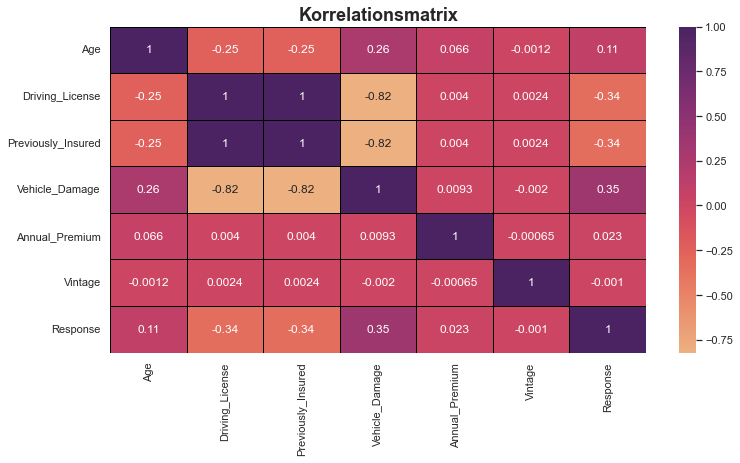

In [53]:
def correlation_matrix(data):
    for columns in data:
        if columns == "id":
            selected_columns = data.drop("id", axis="columns")
            correlation = selected_columns.corr()
            plt.figure(figsize=(12, 6))
            sns.heatmap(
                correlation, annot=True, cmap="flare", linewidths=1, linecolor="black"
            )
            plt.title("Korrelationsmatrix", fontsize=18, weight="bold")

correlation_matrix(data)

- Es fällt auf, dass `Previously_Insured` und `Driving_License` die höchste Korrelation, undzwar von 1, aufweisen. Das liegt daran, dass jeder KFZ-Besitzer eine KFZ-Versicherung haben muss sofern das KFZ angemeldet ist.
- Die geringste Korrelation weisen die Variablen (`Driving_License` und `Vintage`), sowie (`Previously_Insured` und `Vintage`) auf, mit einer Korrelation von 0,0024.
- Hohe negative Korrelation zwischen `Vehicle_Damage` und `Previously_Insured`
- Korrelation von 0,35 zwischen `Vehicle_Damage` und `Response`. Wenn ich in der Vergangenheit einen Schadensfall hatte, bin ich eher dazu geneigt eine Versicherung abzuschließen.
- Alle anderen Variablen sind zudem nahezu unkorreliert.

In [28]:
len(data.loc[data["Driving_License"] != data["Previously_Insured"]])
# Observation was confirmed!
# Columns Driving_License and Previously_Insured are equals!

0

#### 2.8 Interpretation der Variablen <a class="anchor" id="section_2_8"></a>

##### 2.8.1 Interpretation der Variable Gender <a class="anchor" id="section_2_8_1"></a>

Text(0.5, 1.0, 'Balkendiagramm der Variable Gender in Zusammenhang mit Response.\n')

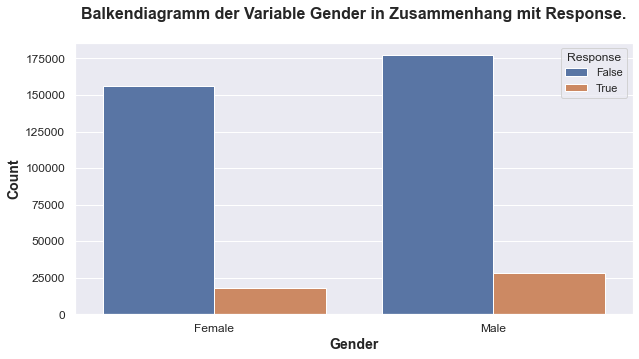

In [29]:
sns.set(rc={"figure.figsize":(10, 5)})

countplot = sns.countplot(data=data, x="Gender", hue="Response")

countplot.set_xlabel("Gender", fontsize = 14, weight="bold")
countplot.set_ylabel("Count", fontsize = 14, weight="bold")

plt.tick_params(axis="both", labelsize=12)
countplot.set_title("Balkendiagramm der Variable Gender in Zusammenhang mit Response." + "\n", fontsize = 16, weight="bold")

##### 2.8.2 Interpretation der Variable Age <a class="anchor" id="section_2_8_2"></a>

Text(0.5, 1.0, 'Betrachtung aller Daten')

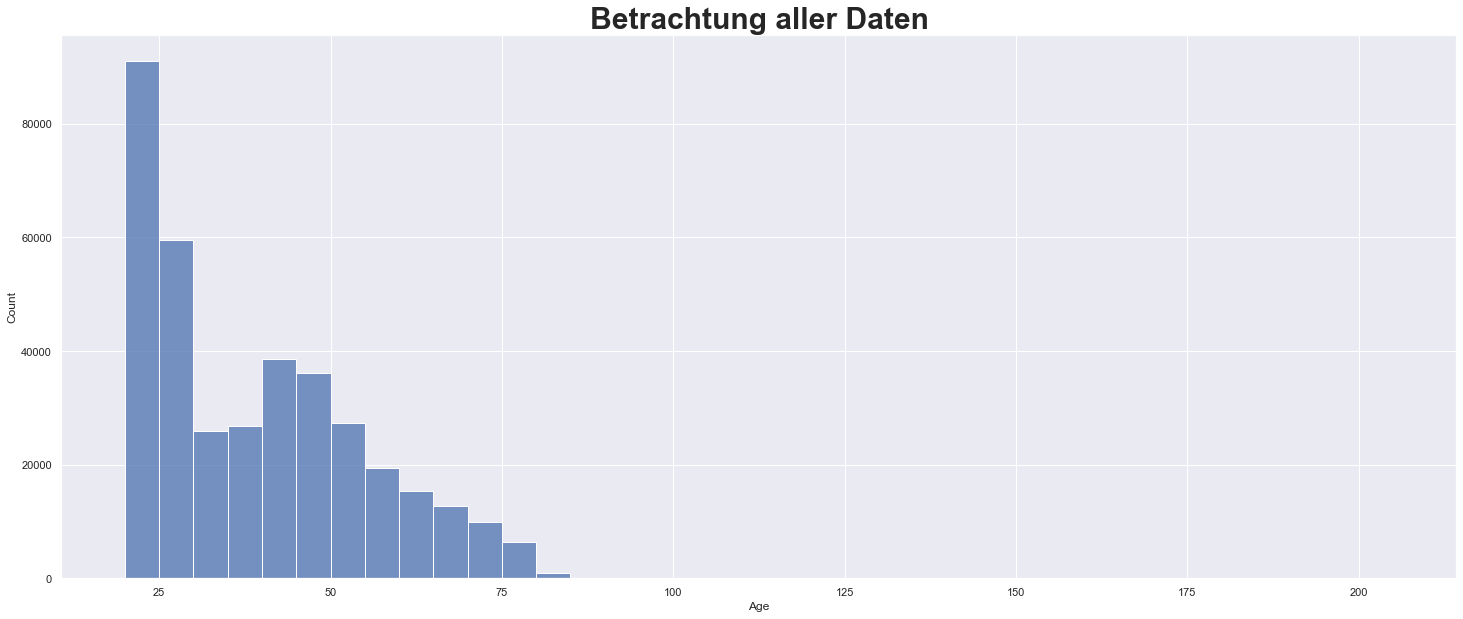

In [30]:
sns.set(rc={"figure.figsize":(25, 10)}) 
histplot_age = sns.histplot(data, x="Age", binwidth=5)
histplot_age.set_title("Betrachtung aller Daten", fontsize = 30, weight='bold')

Beobachtungen:
- Es gibt unrealisitsch hohe Alterswerte
- Aus der Fallbeschreibung konnte entnommen werden, dass es sich um einen Datensatz aus Indien handelt. Es wurde von der Währung Rs (Indische Rupie) gesprochen. Die Altersverteilung kommt der pyramidenförmigen demografischen Verteilung von Indien deutlich näher als der Urnenform von Deutschland. Die geplottete Altersverteilung bestätigt zusätzlich die Datenherkunft und Datengüte, da die erwartete Verteilung, bis auf einen Sattelpunkt bei 30-40, ausgegeben wurde.
- Es gibt keine Werte unter 20, das erklärt sich dadurch, dass Minderjährige nicht fahren dürfen

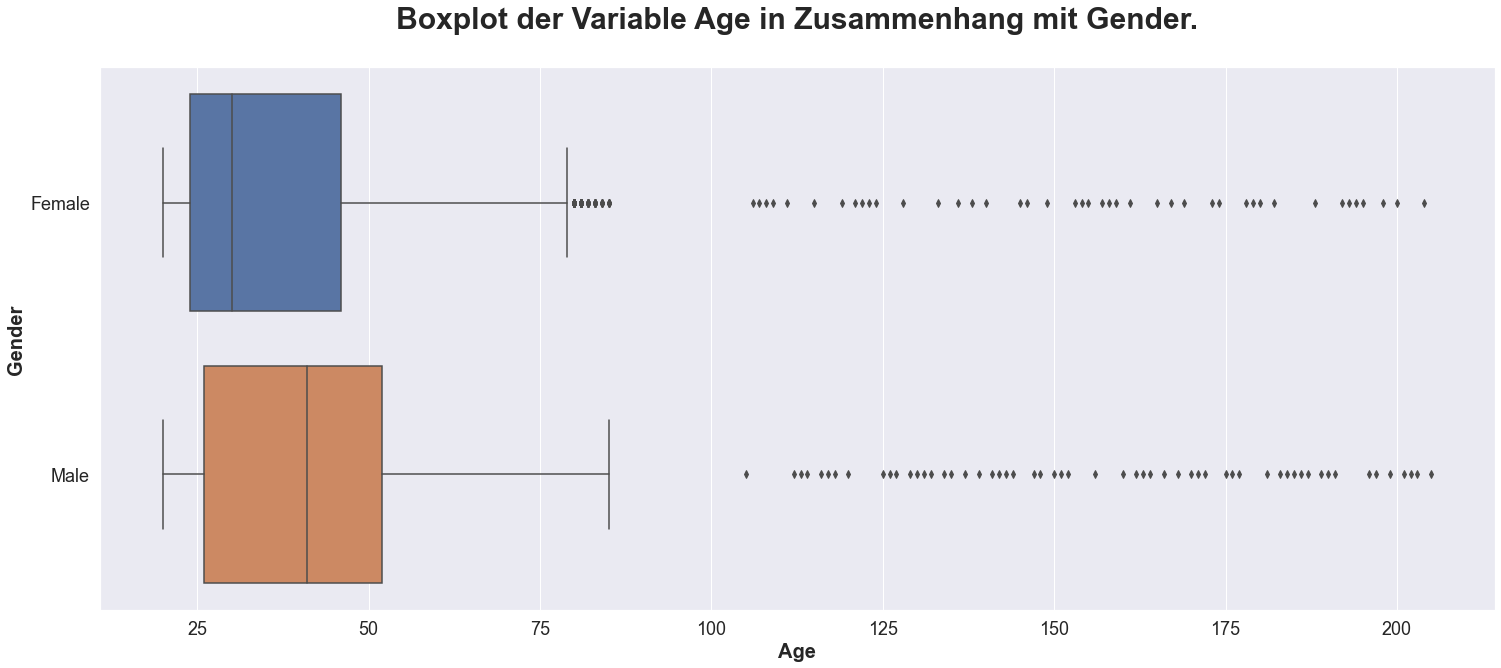

In [31]:
sns.set(rc={"figure.figsize":(25, 10)}) 
boxplot = sns.boxplot(data=data, y="Gender",x="Age", orient="horizontal")
boxplot.set_xlabel("Age", fontsize = 20, weight='bold')
boxplot.set_ylabel("Gender", fontsize = 20, weight='bold')
boxplot.set_title("Boxplot der Variable Age in Zusammenhang mit Gender." + "\n", fontsize = 30, weight='bold')
plt.tick_params(axis="both", labelsize=18)

Alle Datensätze bei denen das Alter über 100 Jahren liegt, sind nicht realitätsnah und werden genauer betrachtet:

In [32]:
data.loc[(data.Age >= 100)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
2444,2445,Female,133,True,12.0,True,< 1 Year,False,29183.0,152.0,44,False
3734,3735,Male,171,False,28.0,False,1-2 Year,True,27966.0,163.0,48,True
4805,4806,Male,163,True,28.0,True,1-2 Year,False,2630.0,124.0,200,False
4858,4859,Male,144,True,26.0,True,< 1 Year,False,30869.0,152.0,288,False
5635,5636,Male,187,False,33.0,False,< 1 Year,True,35397.0,124.0,96,True
...,...,...,...,...,...,...,...,...,...,...,...,...
191789,191790,Male,117,False,28.0,False,> 2 Years,True,47282.0,26.0,62,True
191977,191978,Male,120,False,5.0,False,< 1 Year,True,27514.0,26.0,31,False
192630,192631,Female,108,True,11.0,True,< 1 Year,False,28031.0,152.0,22,False
195149,195150,Male,168,True,10.0,True,< 1 Year,False,2630.0,152.0,26,False


#todo: Beobachtungen rausschreiben

##### 2.8.3 Interpretation der Variable Driving_License <a class="anchor" id="section_2_8_3"></a>


##### 2.8.4 Interpretation der Variable Region_Code <a class="anchor" id="section_2_8_4"></a>


Text(0.5, 1.0, 'Histogramm der Variable Region_Code in Zusammenhang mit Response\n')

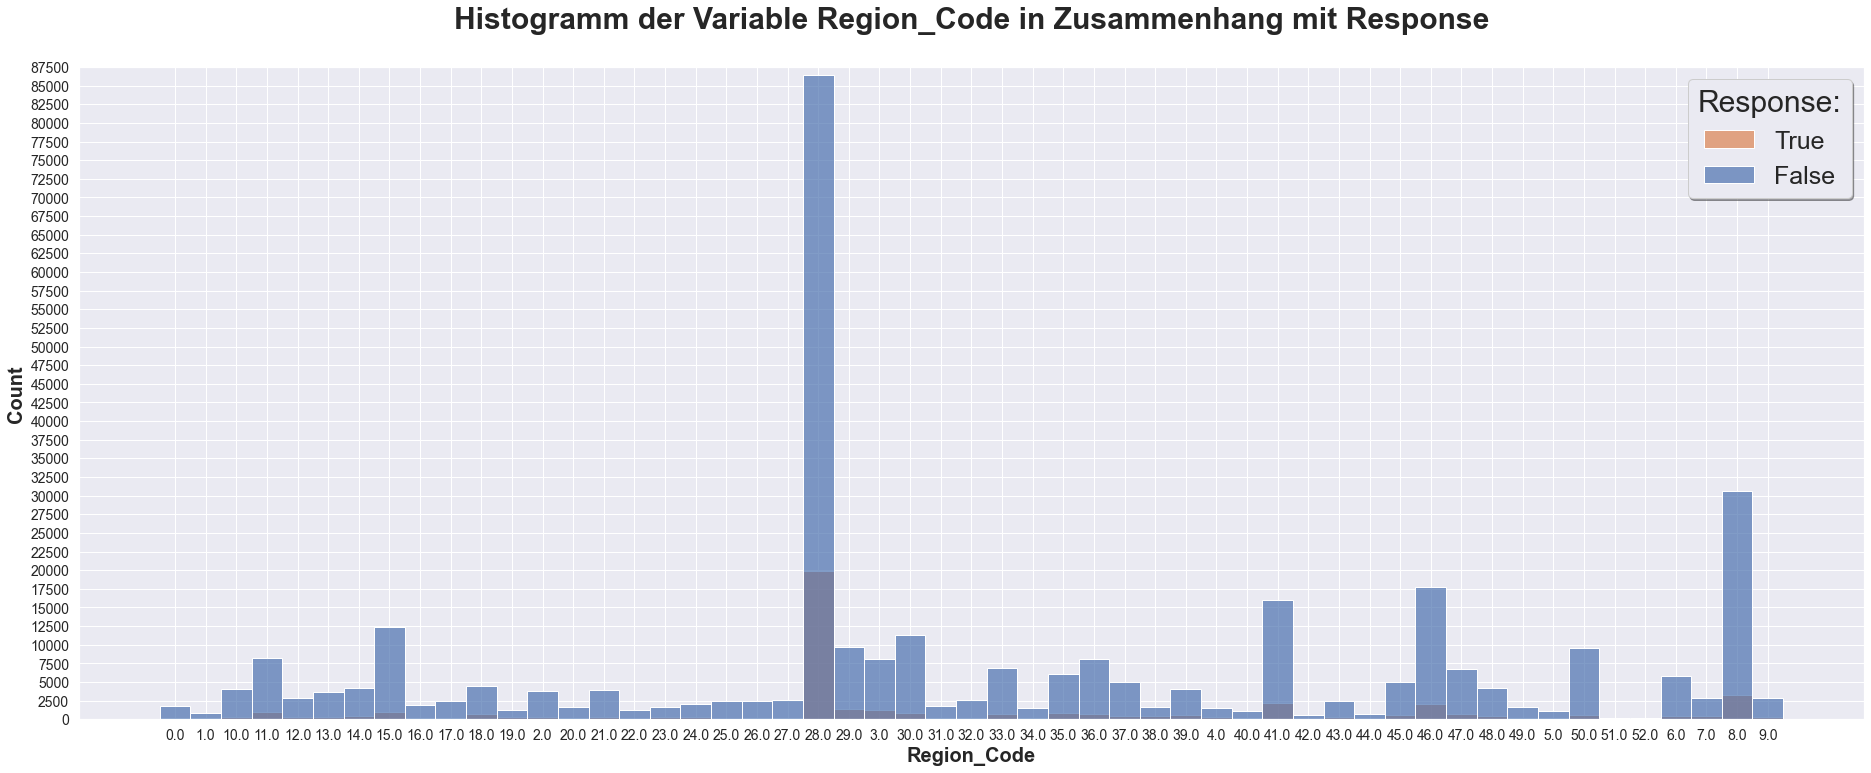

In [33]:
sns.set(rc={"figure.figsize":(32, 12)})     #größe des plots ändern

histogram =sns.histplot(data=data, x="Region_Code", 
                    bins="auto", binwidth=2, 
                    alpha=0.7,
                    hue="Response"
                    )                 

histogram.set_xlabel("Region_Code", fontsize = 20, weight="bold")
histogram.set_ylabel("Count", fontsize = 20, weight="bold")

histogram.set_ylim(0, 87500)
histogram.set_yticks(range(0,87501, 2500))

plt.tick_params(axis="both", labelsize=14)
plt.legend(title="Response:",title_fontsize=30, labels=["True","False"], fontsize = 25, shadow = True) 
histogram.set_title("Histogramm der Variable Region_Code in Zusammenhang mit Response" + "\n", fontsize = 30, weight="bold")

##### 2.8.5 Interpretation der Variable Previously_Insured <a class="anchor" id="section_2_8_5"></a>

##### 2.8.6 Interpretation der Variable Vehicle_Age <a class="anchor" id="section_2_8_6"></a>

Text(0.5, 1.0, 'Balkendiagramm der Variable Vehicle_Age in Zusammenhang mit Gender\n')

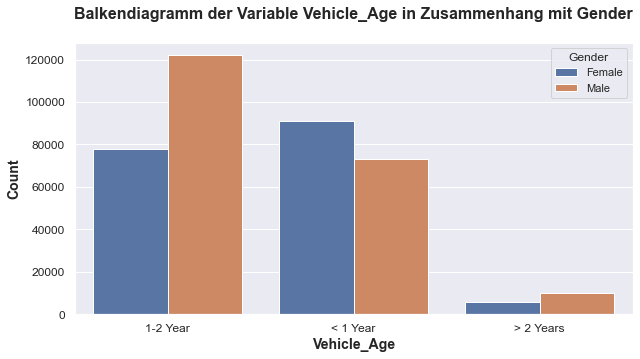

In [34]:
sns.set(rc={"figure.figsize":(10, 5)})

countplot = sns.countplot(data=data, x="Vehicle_Age", hue="Gender")

countplot.set_xlabel("Vehicle_Age", fontsize = 14, weight="bold")
countplot.set_ylabel("Count", fontsize = 14, weight="bold")

plt.tick_params(axis="both", labelsize=12)
countplot.set_title("Balkendiagramm der Variable Vehicle_Age in Zusammenhang mit Gender" + "\n", fontsize = 16, weight="bold")

##### 2.8.7 Interpretation der Variable Vehicle_Damage <a class="anchor" id="section_2_8_7"></a>

##### 2.8.8 Interpretation der Variable Annual_Premium <a class="anchor" id="section_2_8_8"></a>

In [35]:
data["Annual_Premium"].describe()

count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [36]:
# len(data.loc[data["Annual_Premium"].isna()])
data["Annual_Premium"].isna().sum()

0

- Der durchschnittliche `Annual_Premium` liegt bei rund 30.500
- Das Minimun ist negativ, was auf (mindestens) einen fehlerhaften Wert hindeutet
- Es gibt 100 missing Values
- Das Maximum liegt gbei ca. 540.000 (dem 17 fachen des Durchschnitts). Entweder handelt es sich um ein teures Luxusauto, oder um einen Fehler

Text(0.5, 1.0, 'Übersicht über alle Werte')

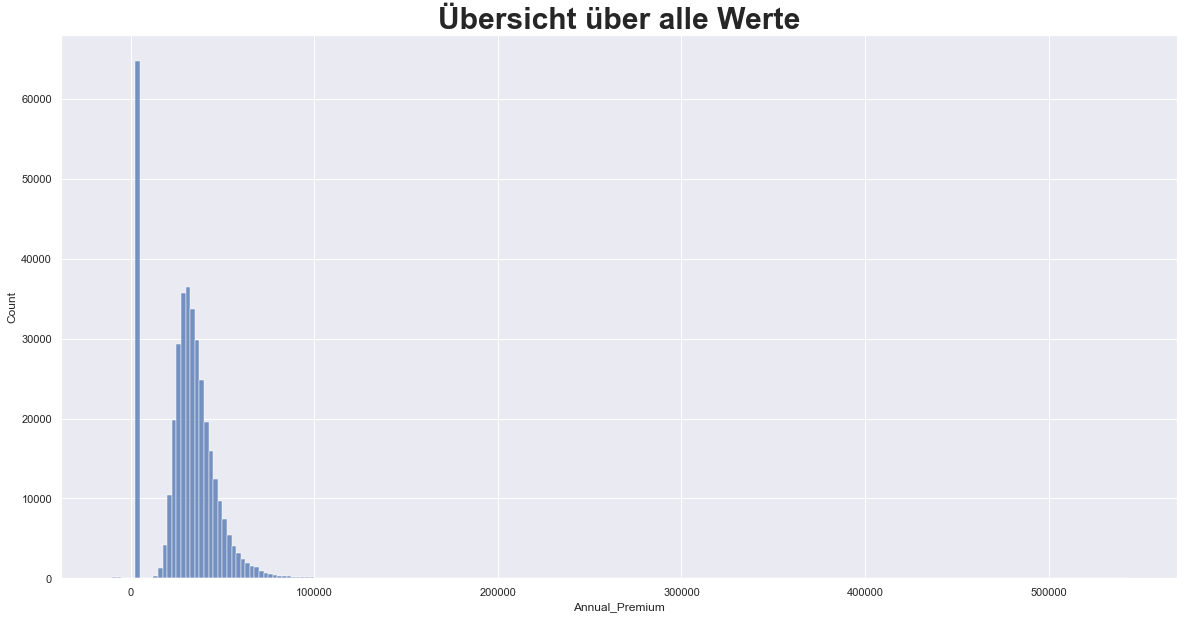

In [37]:
sns.set(rc={"figure.figsize": (20, 10)})

histplot_annual_premium = sns.histplot(data, x="Annual_Premium", binwidth=2500)
histplot_annual_premium.set_title("Übersicht über alle Werte", fontsize = 30, weight='bold')


Beobachtungen:
- Es gibt zwei Arten von Ausreißern. es gibt eine deutliche Konzentration (~65.000) bei einem Wert, außerhalb der eigentlichen Verteilung
- Es gibt wenige besonders hohe Werte (>100.000)
- Die Skala für `Annual_Premium` beginnt nicht bei 0, also gibt es invalide negative Werte

In [38]:
# count values < 3.000
print(f"Anzahl konzentrierter Werte bei rund 2.500: {len(data.loc[(data['Annual_Premium'] > 0) & (data['Annual_Premium'] < 3000)])}")

# count values > 100.000 -> 773
print(f"Anzahl besonders hoher Werte für Annual_Premium: {len(data.loc[data['Annual_Premium'] > 100000])}")


Anzahl konzentrierter Werte bei rund 2.500: 64805
Anzahl besonders hoher Werte für Annual_Premium: 775


Theorie: Das `Annual_Premium` ist abhängig vom Alter des Versicherten.

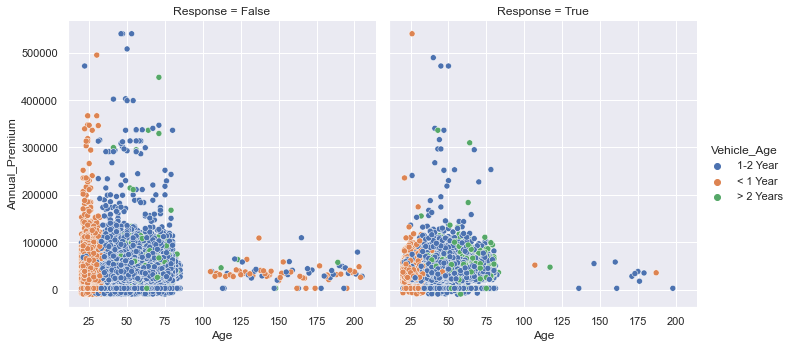

In [39]:
sns.set(rc={"figure.figsize": (20, 10)})
x = sns.relplot(data=data, x="Age", y="Annual_Premium", col="Response", hue="Vehicle_Age")


Beobachtung:
- Die Theorie scheint nicht zu stimmen. Es hätte ein Abwärtstrend zu sehen sein müssen.
- Vor allem in der Gruppe der unter einem Jahr alten Autos kann man sehen, dass die Besitzer fast ausschließlich Versicherungen abgeschlossen haben, wenn sie bereits einen günstigen Tarif hatten.

Text(0.5, 1.0, 'Betrachtung des validen/realistischen Datenbereichs')

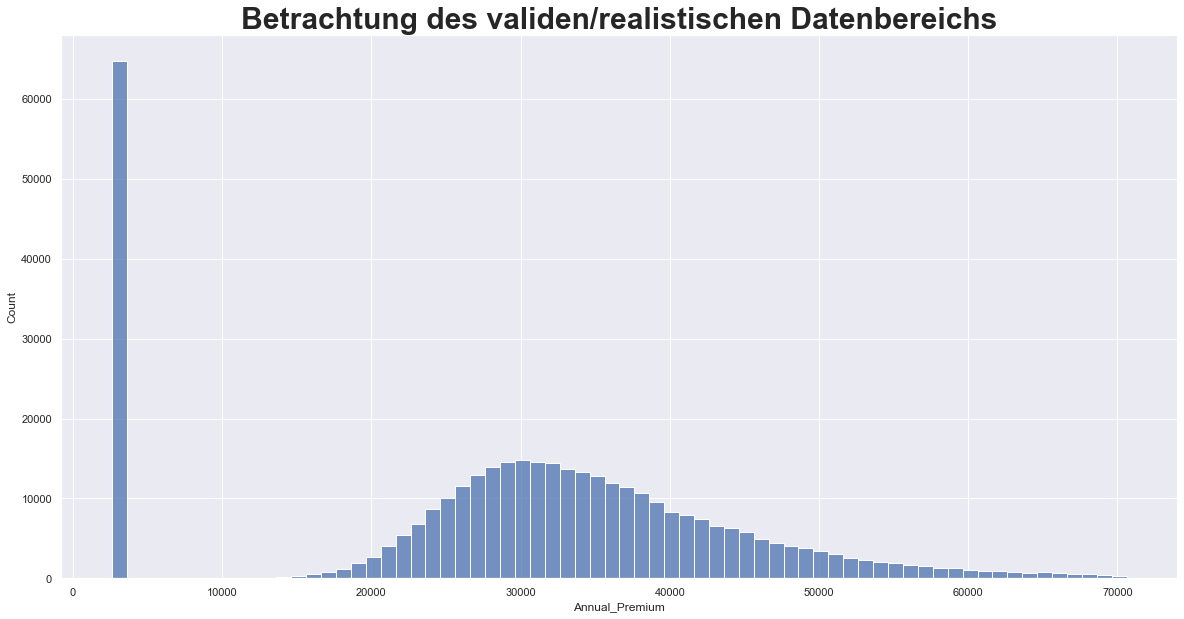

In [40]:
sns.set(rc={"figure.figsize": (20, 10)})

plot_data = data.loc[(data["Annual_Premium"] > 0) & (data["Annual_Premium"] < 70000)]

histplot_annual_premium = sns.histplot(plot_data, x="Annual_Premium", binwidth=1000)
histplot_annual_premium.set_title("Betrachtung des validen/realistischen Datenbereichs", fontsize = 30, weight='bold')


Beobachtungen:
- rechtsschiefe Verteilung um 30.000
- Ausreißer bei rund 2.000. Das ist möglicherweise ein besonderer Versicherungstarif, z.B. ein pauschaler Tarif für bestimmte Fahrzeugarten.

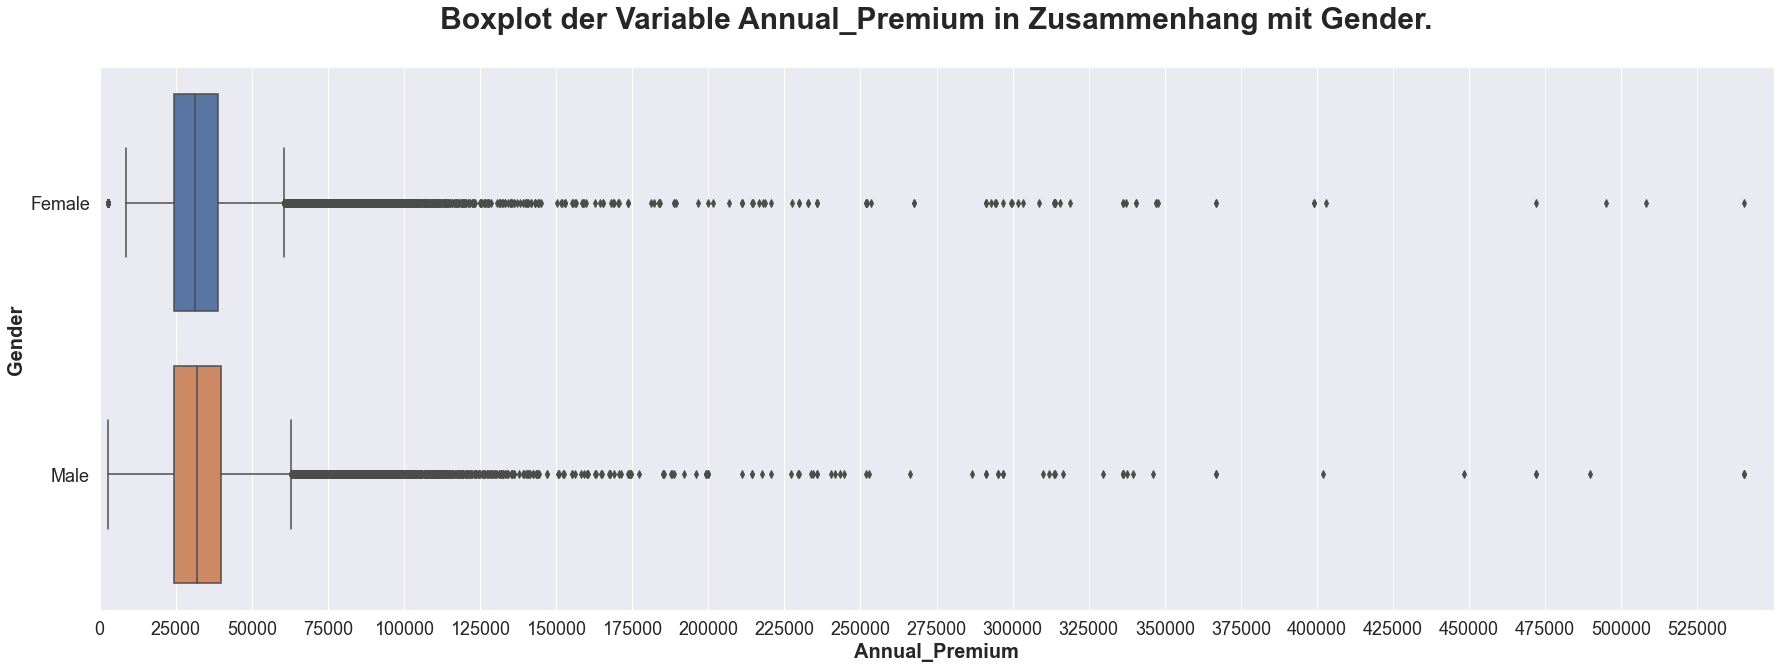

In [41]:
sns.set(rc={"figure.figsize":(30, 10)}) 
boxplot = sns.boxplot(data=data, y="Gender",x="Annual_Premium", orient="horizontal")
boxplot.set_xlabel("Annual_Premium", fontsize = 20, weight='bold')
boxplot.set_ylabel("Gender", fontsize = 20, weight='bold')

boxplot.set_xlim(0, 550000)
boxplot.set_xticks(range(0, 550000, 25000))

boxplot.set_title("Boxplot der Variable Annual_Premium in Zusammenhang mit Gender." + "\n", fontsize = 30, weight='bold')
plt.tick_params(axis="both", labelsize=18)

##### 2.8.9 Interpretation der Variable Policy_Sales_Channel <a class="anchor" id="section_2_8_9"></a>

##### 2.8.10 Interpretation der Variable Vintage <a class="anchor" id="section_2_8_10"></a>

##### 2.8.11 Interpretation der Variable Response <a class="anchor" id="section_2_8_11"></a>

### 3. Data Preparation <a class="anchor" id="chapter3"></a>

Die Erkenntnisse, die im Kapitel **Data Understanding** gewonnen wurden, werden nachfolgend angewandt, um invalide Daten zu entfernen und die Datenqualität zu erhöhen

#### 3.1 Ausreißer behandeln <a class="anchor" id="section_3_1"></a>

##### 3.1.1 Ausreißer innerhalb der Variable Age <a class="anchor" id="section_3_1_1"></a>

- Ab dem Alter >=100 Jahre werden alle Werte in Missing Values umgewandelt, da dieses Alter nicht realistisch ist.
- Diese Grenze wurde als großzügige Einschätzung den zu erwartenden Lebensalters festgelegt.
- Von dieser Änderung sind 100 Datensätze betroffen.

In [42]:
# len(data.loc[data["Age"]> 100])
data.loc[data["Age"] > 100, "Age"] = np.NaN
data.loc[data["Age"] < 18, "Age"] = np.NaN

#### 3.1.2 Ausreißer innerhalb der Variable Annual_Premium <a class="anchor" id="section_3_1_2"></a>

In [43]:
data["Annual_Premium"].describe()

count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Negative Werte für `Annual_Premium` sind nicht valide. Es würde bedeuten, dass die Versicherungsgesellschaft den Kunden bezahlt.

In [44]:
# remove negative values
data.loc[data["Annual_Premium"] < 0, "Annual_Premium"] = np.NaN

#### 3.2 Analyse der nicht vorhandenen Werte <a class="anchor" id="section_3_2"></a>

#### 3.2.1 Löschen der 51 fehlerhaften Datensätze <a class="anchor" id="section_3_2_1"></a>

Wie im Abschnitt Data Unterstanding beschrieben wurden 51 Datensätze mit vielen fehlenden Werten gefunden. Da diese keinen signifikanten Einfluss auf das Modell haben werden, werden sie entfernt.

In [45]:
# remove faulty data sets
# bad_data was generated before and contains 51 data sets that we want to remove
data = data.loc[~data["id"].isin(bad_data["id"].to_numpy())]  # ~ = not
data.isna().sum()

id                          0
Gender                   1000
Age                     10941
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium            367
Policy_Sales_Channel        0
Vintage                     0
Response                    0
dtype: int64

#### 3.3 Imputation der fehlenden Werte <a class="anchor" id="section_3_3"></a>


##### 3.3.1 Variante 1: Ersetzung der fehlenden Werte durch den Mittelwert <a class="anchor" id="section_3_3_1"></a>

##### 3.3.1.1 Imputation der Variable age <a class="anchor" id="section_3_3_1_1"></a>

In [46]:
data_imputer_age_mean = SimpleImputer(strategy="mean", missing_values=np.nan)
data_imputer_age_mean = data_imputer_age_mean.fit(data[["Age"]])
data["Age"] = data_imputer_age_mean.transform(data[["Age"]])
data.isna().sum()

id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium           367
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.1.2 Imputation der Variable Annual_Premium <a class="anchor" id="section_3_3_1_2"></a>

In [47]:
data_imputer_age_mean = SimpleImputer(strategy="mean", missing_values=np.nan)
data_imputer_age_mean = data_imputer_age_mean.fit(data[["Annual_Premium"]])
data["Annual_Premium"] = data_imputer_age_mean.transform(data[["Annual_Premium"]])
data.isna().sum()

id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.2 Variante 2: Ersetzung der fehlenden Werte durch den Median <a class="anchor" id="section_3_3_2"></a>

##### 3.3.2.1 Imputation der Variable age <a class="anchor" id="section_3_3_2_1"></a>

In [48]:
data_imputer_age_median = SimpleImputer(strategy="median", missing_values=np.nan)
data_imputer_age_median = data_imputer_age_median.fit(data[["Age"]])
data["Age"] = data_imputer_age_median.transform(data[["Age"]])
data.isna().sum()

id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.2.2 Imputation der Variable Annual_Premium <a class="anchor" id="section_3_3_2_2"></a>

In [49]:
data_imputer_age_median = SimpleImputer(strategy="median", missing_values=np.nan)
data_imputer_age_median = data_imputer_age_median.fit(data[["Annual_Premium"]])
data["Annual_Premium"] = data_imputer_age_median.transform(data[["Annual_Premium"]])
data.isna().sum()

id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.3 Variante 3: Ersetzung der fehlenden Werte durch Hot Code Imputation (LOCF) <a class="anchor" id="section_3_3_3"></a>

##### 3.3.3.1 Imputation der Variable Age <a class="anchor" id="section_3_3_3_2"></a>

In [50]:
data_v3 = data
data_v3["Age"].fillna(method="ffill", inplace=True)
data_v3.isna().sum()

id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.3.2 Imputation der Variable Annual_Premium <a class="anchor" id="section_3_3_3_2"></a>

In [51]:
data_v3 = data
data_v3["Annual_Premium"].fillna(method="ffill", inplace=True)
data_v3.isna().sum()

id                         0
Gender                  1000
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Response                   0
dtype: int64

##### 3.3.4 Ersetzung der fehlenden Werte kategorialer Variablen <a class="anchor" id="section_3_3_4"></a>

##### 3.3.4.1 Imputation der Variable Gender <a class="anchor" id="section_3_3_4_1"></a>

In [52]:
data_imputer_age_median = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data_imputer_age_median = data_imputer_age_median.fit(data[["Gender"]])
data["Gender"] = data_imputer_age_median.transform(data[["Gender"]])
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64